In [46]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import keras

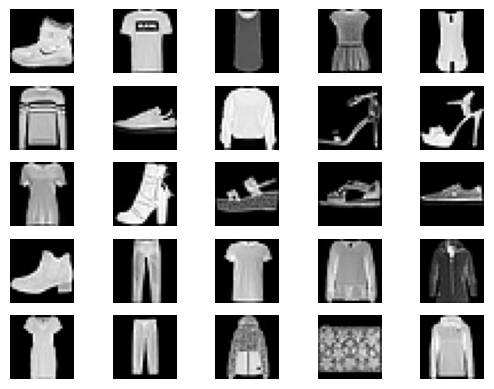

In [47]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train =  X_train.astype(np.float32)   
X_test =   X_test.astype(np.float32)   

show_imgs(X_train)

In [48]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


In [49]:
# convert label vectors to one-hot encoding
n_classes = 10
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)   
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


#### Implement a model for classifying Fashion-MNIST
- Use at least (in total) 5 hidden conv or fully connected layers 
- Use Tanh non-linearity (activation function)
- Use the defaults for parameter initialisation (i.e. don’t specify anything for initialising weights and biases)

In [50]:
 # defining the model
input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))
model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh'))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 28, 28, 1)        3         
 tion)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 32)        2336      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 3, 3, 128)       

#### Use this as a baseline and train the model over (at least) 10 epochs 
- use Adam with default settings 
- Use input data normalisation -> done with Normalisation layer in model definition in previous step

Remember the training/validation curves (cost, accuracy). 

In [51]:
# Training
E = 10
B = 128
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 9s 19ms/step - loss: 0.4895 - accuracy: 0.8242 - val_loss: 0.3448 - val_accuracy: 0.8730
Epoch 2/10
422/422 [==============================] - 9s 21ms/step - loss: 0.3175 - accuracy: 0.8822 - val_loss: 0.3140 - val_accuracy: 0.8833
Epoch 3/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2720 - accuracy: 0.8987 - val_loss: 0.3002 - val_accuracy: 0.8888
Epoch 4/10
422/422 [==============================] - 8s 20ms/step - loss: 0.2374 - accuracy: 0.9113 - val_loss: 0.2807 - val_accuracy: 0.8948
Epoch 5/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2137 - accuracy: 0.9206 - val_loss: 0.2700 - val_accuracy: 0.9007
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.1920 - accuracy: 0.9282 - val_loss: 0.2803 - val_accuracy: 0.8963
Epoch 7/10
422/422 [==============================] - 8s 18ms/step - loss: 0.1758 - accuracy: 0.9342 - val_loss: 0.2918 - val_accuracy: 0.9013

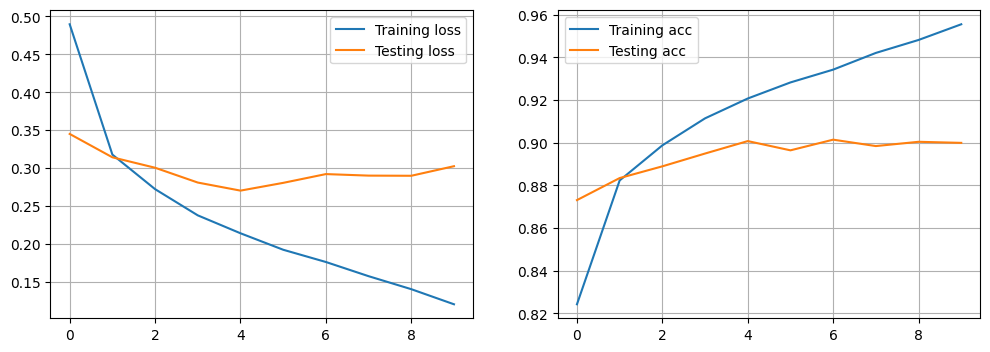

In [52]:
# Plot train log (baseline model)
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

NOTE: Default initializers in Keras: 
- Weigts -> Xavier Glorot
- Bias -> 0

=> By default already optimized to minimize vanishing gradients problem

#### Changing initialisation of weights and biases

Specifying Initializers in Keras -> `kernel_initialize` and `bias_initializer` arguments in layer


Keras initializers:
- Standard normal: `keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)`
- Uniform: `keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)`
- Glorot normal: `keras.initializers.GlorotNormal(seed=None)`
- He normal: `keras.initializers.HeNormal(seed=None)`
- Zeros: `keras.initializers.Zeros()` 

Now play with other initialisers. Train the model for each setting over (at least) 10 epochs
and remember the resulting training /validation curves.

- zero weight and zero bias
- standard normal ($\sigma = 1$) weights and zero bias
- uniform weights (∼ U(−1/2, 1/2)) and zero bias.
- Xavier Glorot initialization (for tanh) with zero bias.
- Kaiming He initialization (for ReLU) with zero bias.

##### Initialization with zero weights and zero bias

In [53]:
 # defining the model
kernel_initializer=keras.initializers.Zeros()
bias_initializer=keras.initializers.Zeros()

input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))

model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh', 
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Dense(100, activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

In [54]:
# Training
E = 10
B = 128
log_zeros = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 10s 22ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0973
Epoch 2/10
422/422 [==============================] - 7s 17ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0925
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1027
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.0942
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0925
Epoch 6/10
422/422 [==============================] - 7s 17ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0925
Epoch 7/10
422/422 [==============================] - 7s 18ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.092

##### Initialization with standard normal weights and zero bias

In [55]:
 # defining the model
kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.0)
bias_initializer=keras.initializers.Zeros()

input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))

model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh', 
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Dense(100, activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

c:\Users\ayome\miniconda3\envs\DeLearn\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [56]:
# Training
E = 10
B = 128
log_std = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 8s 18ms/step - loss: 6.1271 - accuracy: 0.2265 - val_loss: 3.0906 - val_accuracy: 0.3048
Epoch 2/10
422/422 [==============================] - 7s 17ms/step - loss: 2.2927 - accuracy: 0.3404 - val_loss: 1.7582 - val_accuracy: 0.3780
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 1.6165 - accuracy: 0.3929 - val_loss: 1.4710 - val_accuracy: 0.4165
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 1.4132 - accuracy: 0.4431 - val_loss: 1.3313 - val_accuracy: 0.4550
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 1.2855 - accuracy: 0.4869 - val_loss: 1.2539 - val_accuracy: 0.4968
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 1.1927 - accuracy: 0.5294 - val_loss: 1.1645 - val_accuracy: 0.5272
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 1.1193 - accuracy: 0.5628 - val_loss: 1.1085 - val_accuracy: 0.5715

##### Initialization with uniform weights and zero bias

In [57]:
 # defining the model
kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5)
bias_initializer=keras.initializers.Zeros()

input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))

model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh', 
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Dense(100, activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

c:\Users\ayome\miniconda3\envs\DeLearn\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [58]:
# Training
E = 10
B = 128
log_unif = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 8s 17ms/step - loss: 0.8989 - accuracy: 0.6837 - val_loss: 0.6159 - val_accuracy: 0.7720
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.5613 - accuracy: 0.7928 - val_loss: 0.5365 - val_accuracy: 0.8053
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.5011 - accuracy: 0.8164 - val_loss: 0.4916 - val_accuracy: 0.8163
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.4553 - accuracy: 0.8315 - val_loss: 0.4692 - val_accuracy: 0.8263
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 0.4279 - accuracy: 0.8405 - val_loss: 0.4547 - val_accuracy: 0.8353
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 0.4036 - accuracy: 0.8507 - val_loss: 0.4231 - val_accuracy: 0.8458
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 0.3863 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.8403

##### Initialization with Xavier Glorot weights and zero bias

In [59]:
 # defining the model
kernel_initializer=keras.initializers.GlorotUniform()
bias_initializer=keras.initializers.Zeros()

input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))

model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh', 
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Dense(100, activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

c:\Users\ayome\miniconda3\envs\DeLearn\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [60]:
# Training
E = 10
B = 128
log_glorot = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 8s 17ms/step - loss: 0.5083 - accuracy: 0.8152 - val_loss: 0.3576 - val_accuracy: 0.8618
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.3256 - accuracy: 0.8792 - val_loss: 0.3188 - val_accuracy: 0.8812
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2822 - accuracy: 0.8946 - val_loss: 0.3139 - val_accuracy: 0.8793
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2502 - accuracy: 0.9076 - val_loss: 0.3115 - val_accuracy: 0.8827
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2241 - accuracy: 0.9161 - val_loss: 0.2793 - val_accuracy: 0.8953
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2069 - accuracy: 0.9226 - val_loss: 0.2708 - val_accuracy: 0.8985
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1891 - accuracy: 0.9297 - val_loss: 0.2740 - val_accuracy: 0.9005

##### Initialization with Kaiming He weights and zero bias

In [61]:
 # defining the model
kernel_initializer=keras.initializers.HeUniform()
bias_initializer=keras.initializers.Zeros()

input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.Input(input_dim))
model.add(keras.layers.Normalization(axis=-1))

model.add(keras.layers.Conv2D(8, (3,3), padding='valid', activation='tanh', 
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Dense(100, activation='tanh',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

print("changed the thing!")

changed the thing!


c:\Users\ayome\miniconda3\envs\DeLearn\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [62]:
# Training
E = 10
B = 128
log_he = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 8s 17ms/step - loss: 0.5192 - accuracy: 0.8156 - val_loss: 0.3804 - val_accuracy: 0.8580
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.3419 - accuracy: 0.8736 - val_loss: 0.3414 - val_accuracy: 0.8758
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2942 - accuracy: 0.8915 - val_loss: 0.3382 - val_accuracy: 0.8737
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2611 - accuracy: 0.9030 - val_loss: 0.3203 - val_accuracy: 0.8852
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2285 - accuracy: 0.9142 - val_loss: 0.3128 - val_accuracy: 0.8850
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2053 - accuracy: 0.9232 - val_loss: 0.3277 - val_accuracy: 0.8775
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1860 - accuracy: 0.9318 - val_loss: 0.3141 - val_accuracy: 0.8913

##### Plotting
Create a comparison plot and discuss the results. Are they as expected from the theory
that you have learned in class ?

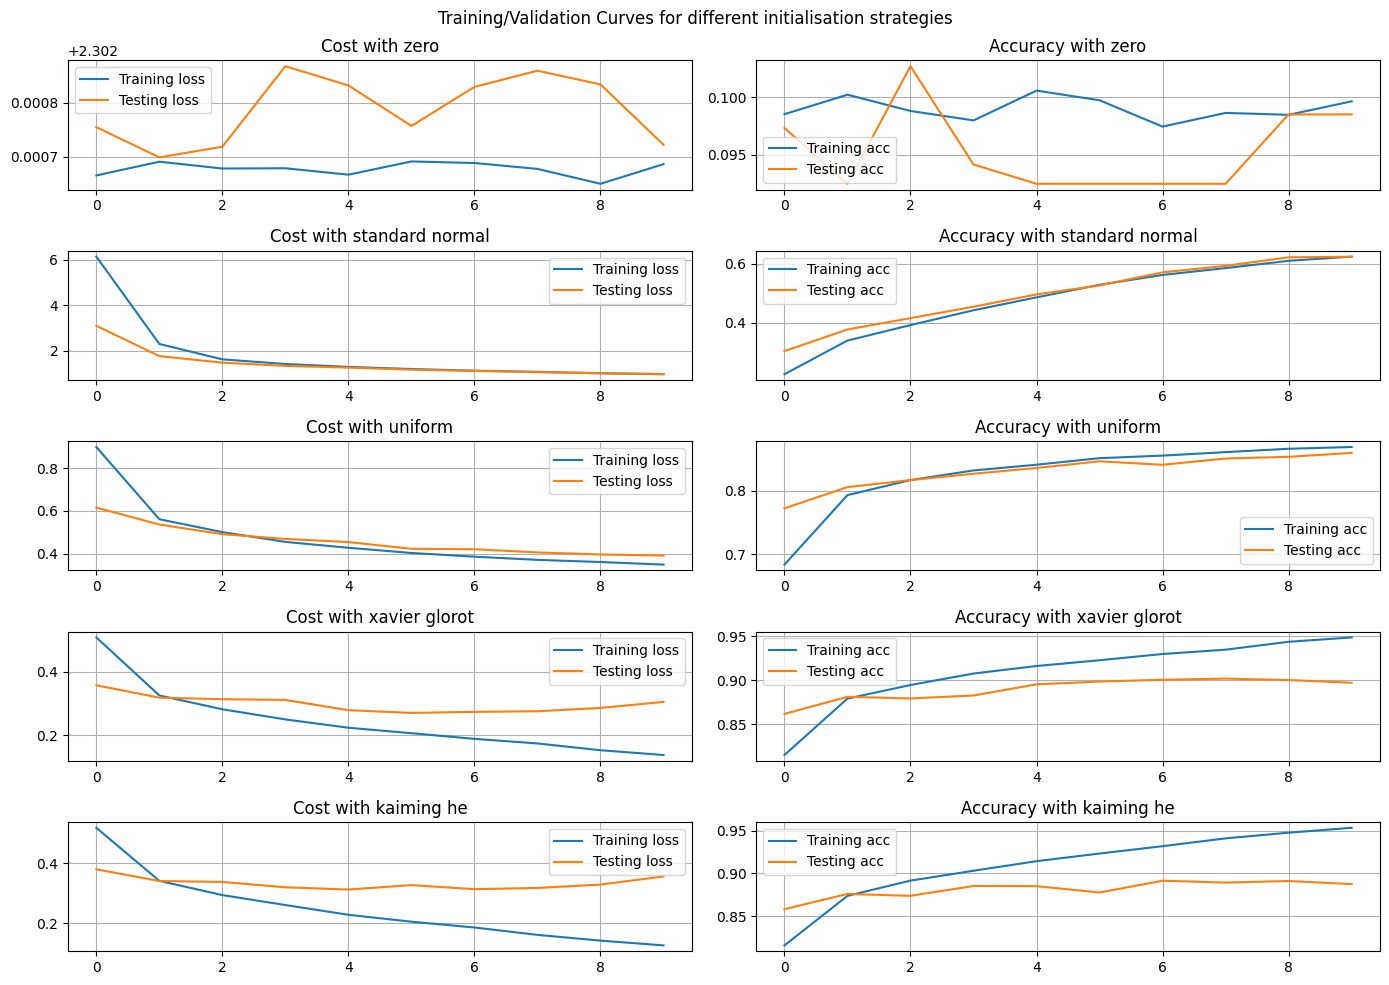

In [64]:
from matplotlib.gridspec import GridSpec

init_weight_strategies = ['zero', 'standard normal', 'uniform', 'xavier glorot', 'kaiming he']
logs = [log_zeros, log_std, log_unif, log_glorot, log_he]

fig = plt.figure(figsize=(14, 10), tight_layout=True)
fig.suptitle("Training/Validation Curves for different initialisation strategies")
gs = GridSpec(len(init_weight_strategies), 2, fig)

for i, str_strategy in enumerate(init_weight_strategies):
    fig.add_subplot(gs[i, 0])
    plt.title("Cost with {}".format(str_strategy))
    plt.plot(logs[i].history['loss'], label='Training loss')
    plt.plot(logs[i].history['val_loss'], label='Testing loss')
    plt.grid(True)
    plt.legend()

    fig.add_subplot(gs[i, 1])
    plt.title("Accuracy with {}".format(str_strategy))
    plt.plot(logs[i].history['accuracy'], label='Training acc')
    plt.plot(logs[i].history['val_accuracy'], label='Testing acc')
    plt.grid(True)
    plt.legend()



##### Discussion

The activation function for all layers is _tanh_, an s-shaped function with saturation characteristics --> without specially designed initialisation strategies (Glorot or He), this leads to vanishing gradient problems in deep neural nets.

**Zero**: The main issue here is that all the weights are the same value and the DNN is unable to break symmetry. All neurons will be updated the same way, making it impossible to learn complex functions.

**Standard Normal**: This initialisation strategy introduced randomness to break symmetry and also centers the weight distribution around zero, centering the input of the following activation function as well and limiting saturation.

**Uniform [-0.5, 0.5]**: Initially surprisingly, this strategy actually significantly outperforms standard normal initialisation. I attribute this to the following:

- Because the distribution is only non-zero in the [-0.5, 0.5] interval, saturation is initially completely impossible. 
- More evenly spreading the weights around the center (rather favouring the center like the gauss-shape) gives the DNN higher representational capacity initially. It's like it has a more "open mind" initially, rather than arbitrarily being biased towards zero.

**Xavier Glorot**: Being taylored specifically for the use in conjunction with the tanh activation function, the Glorot method clearly shines. Also note that this is the default in Keras, so this result is the same as the baseline model trained earlier with default initialisation.

**Kaiming He**: This initialisation strategy is designed for use with ReLU-like activation functions. Nontheless, it performs almost identically to Glorot. Their formulas do only differ by a scaling factor, after all.


Note on Costs:

It is somewhat striking, how often the model with the consistently higher cost shows lower accuracy compared to another with lower cost. One explanation is, that CE-Loss punishes a somewhat uncertain, but correct model more than a very confident but more often incorrect one.


